In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from math import sqrt

import keila_wrangle as w

In [2]:
df = w.read_wine()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,red


In [7]:

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,red


In [3]:
train, validate, test = w.clean_wine()

46 outliers removed from fixed acidity.
26 outliers removed from volatile acidity.
11 outliers removed from citric acid.
5 outliers removed from residual sugar.
63 outliers removed from chlorides.
15 outliers removed from free sulfur dioxide.
2 outliers removed from total sulfur dioxide.
0 outliers removed from density.
4 outliers removed from pH.
21 outliers removed from sulphates.
0 outliers removed from alcohol.
0 outliers removed from quality.
0 outliers removed from red_wine.

Total of 193 outliers removed.


In [4]:
# splitting into x and y
target = "quality"
train, validate, test, x_train, y_train, x_validate, y_validate, x_test, y_test = w.split_data_xy(train, validate, test, target)

train -> (3782, 14)
validate -> (1261, 14)
test -> (1261, 14)


In [5]:
# scaling data
x_train_scaled, x_validate_scaled, x_test_scaled = w.mm_scale(x_train, x_validate, x_test)

1. What is the distribution of each of the variables?

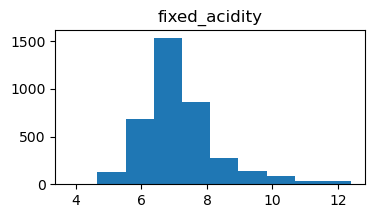

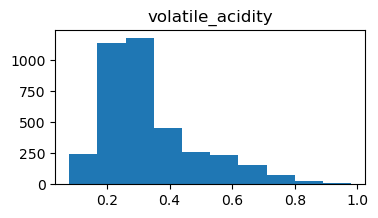

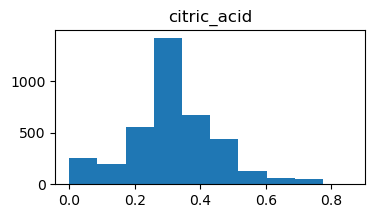

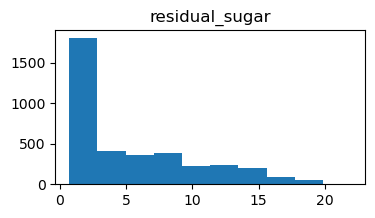

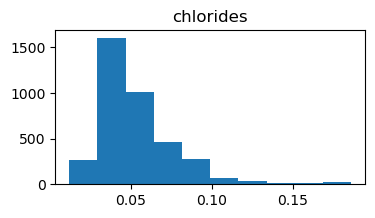

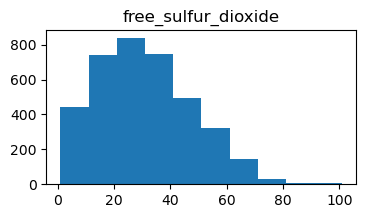

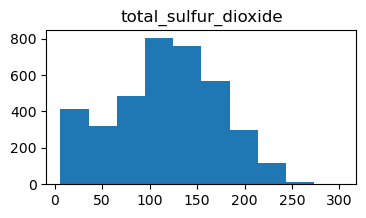

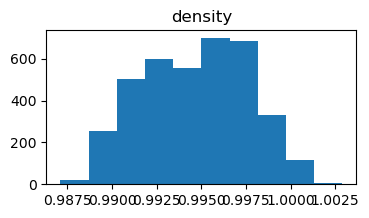

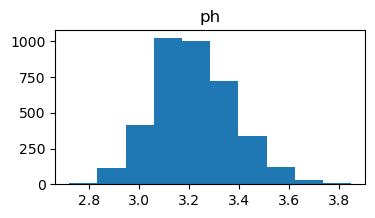

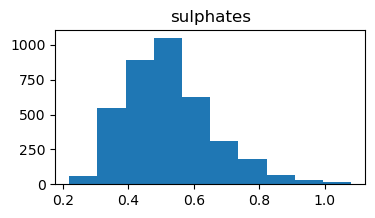

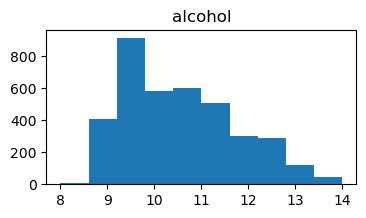

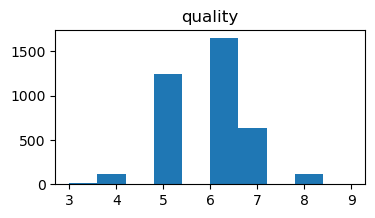

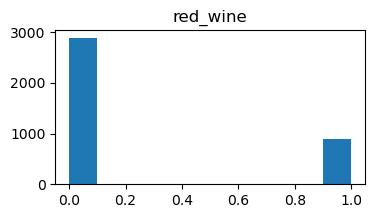

In [6]:
for col in train.drop(columns='wine_type').columns:
    plt.figure(figsize=(4,2))
    plt.hist(train[col])
    plt.title(col)
    plt.show()

conclusion:

    * normal dist -- citrc_acid, density, ph, quality
    
    * skews to the right -- red_wine, alcohol, sulphates, total_sulfur_dioxide,  free_sulfur_dioxide, cholrides, residual_sugar, volatile_acidity, fixed_acidity
    
    * The sample has more white wine than red

exploratory Questions:
    
    - Is there a relationship between citric acid and quality?
    - Is there a relationship between density and quality?
    - Is there a relationship between ph and quality?
    
    - residual suger and density 
    

 # Statistical testing 

In [17]:
def corr_test(train, x_col, y_col):
    corr, p = stats.pearsonr(train[x_col], train[y_col])
    if p < alpha:
        print("We reject the null hypothesis")
    else:
        print("We fail to reject null hypothesis")
    return corr, p


In [18]:
# confidence level = 95% 
alpha = 0.05

$H_o$: There is no linear correlation between 'fixed_acidity' and the 'quality' on the wine.

$H_a$: There is a linear relationship between 'fixed_acidity' and the 'quality' on the wine.

In [19]:
corr_test(train, "fixed_acidity", "quality")

We reject the null hypothesis


(-0.07827511127209155, 1.4387175286092745e-06)

$H_o$: There is no linear correlation between 'volatile_acidity' and the 'quality' on the wine.

$H_a$: There is a linear relationship between 'volatile_acidity' and the 'quality' on the wine.

In [26]:
corr_test(train, "quality", "volatile_acidity")

We reject the null hypothesis


(-0.25265237698603427, 3.6861081532008405e-56)

$H_o$: There is no linear correlation between 'citric_acid' and the 'quality' on the wine.

$H_a$: There is a linear relationship between 'citric_acid' and the 'quality' on the wine.

In [27]:
corr_test(train, "quality", "citric_acid")

We reject the null hypothesis


(0.09185134519020383, 1.5246273425609698e-08)

$H_o$: There is no linear correlation between 'residual_sugar' and the 'quality' on the wine.

$H_a$: There is a linear relationship between 'residual_sugar' and the 'quality' on the wine.

In [28]:
corr_test(train, "quality", "residual_sugar")

We reject the null hypothesis


(-0.04557102612604648, 0.005062099302586473)

$H_o$: There is no linear correlation between 'chlorides' and the 'quality' on the wine.

$H_a$: There is a linear relationship between 'chlorides' and the 'quality' on the wine.

In [29]:
corr_test(train, "quality", "chlorides")

We reject the null hypothesis


(-0.22955837695216097, 2.0617450801145316e-46)

$H_o$: There is no linear correlation between 'free_sulfur_dioxide' and the 'quality' on the wine.

$H_a$: There is a linear relationship between 'free_sulfur_dioxide' and the 'quality' on the wine.

In [30]:
corr_test(train, "quality", "free_sulfur_dioxide")

We reject the null hypothesis


(0.06847518237771702, 2.5017709828608667e-05)

$H_o$: There is no linear correlation between 'total_sulfur_dioxide' and the 'quality' on the wine.

$H_a$: There is a linear relationship between 'total_sulfur_dioxide' and the 'quality' on the wine.

In [31]:
corr_test(train, "quality", "total_sulfur_dioxide")

We reject the null hypothesis


(-0.04342487206718959, 0.007564402019911827)

$H_o$: There is no linear correlation between 'density' and the 'quality' on the wine.

$H_a$: There is a linear relationship between 'density' and the 'quality' on the wine.

In [32]:
corr_test(train, "quality", "density")

We reject the null hypothesis


(0.0700862669218869, 1.6029528009553467e-05)

$H_o$: There is no linear correlation between 'ph' and the 'quality' on the wine.

$H_a$: There is a linear relationship between 'ph' and the 'quality' on the wine.

In [33]:
corr_test(train, "quality", "ph")

We reject the null hypothesis


(-0.24833748714288953, 2.931984458638258e-54)

$H_o$: There is no linear correlation between 'sulphates' and the 'quality' on the wine.

$H_a$: There is a linear relationship between 'sulphates' and the 'quality' on the wine.

In [34]:
corr_test(train, "quality", "sulphates")

We reject the null hypothesis


(-0.26468421581346047, 1.176905031210281e-61)

$H_o$: There is no linear correlation between 'alcohol' and the 'quality' on the wine.

$H_a$: There is a linear relationship between 'alcohol' and the 'quality' on the wine.

In [35]:
corr_test(train, "quality", "alcohol")

We reject the null hypothesis


(-0.2790362702935659, 1.3524419698057308e-68)

$H_o$: There is no linear correlation between 'wine_type' and the 'quality' on the wine.

$H_a$: There is a linear relationship between 'wine_type' and the 'quality' on the wine.

In [38]:
corr_test(train, "quality", "red_wine")

We reject the null hypothesis


(-0.11375602349563708, 2.2792373411285852e-12)

train.columns

In [ ]:
# 

$H_o$: There is no linear correlation between 'residual_sugar' and the 'quality' on the wine.

$H_a$: There is a linear relationship between 'residual_sugar' and the 'quality' on the wine.

In [40]:
corr_test(train, "quality", "residual_sugar")

We reject the null hypothesis


(-0.04557102612604648, 0.005062099302586473)

$H_o$: There is no linear correlation between 'density' and the 'quality' on the wine.

$H_a$: There is a linear relationship between 'density' and the 'quality' on the wine.

In [41]:
corr_test(train, "quality", "density")

We reject the null hypothesis


(-0.32055700121430664, 4.0411344714683615e-91)